Dataset link --- https://www.kaggle.com/blastchar/telco-customer-churn

Aim -- To predict whether customer keeps or left the Telecom Service.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("F:\\ML NOTES\\Dataset\\Telco-Customer-Churn.csv")

In [5]:
data.shape

(7043, 21)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Dropping customerID column 

data = data.drop(['customerID'], axis = 1)

In [10]:
# to convert Total Charges column from object to float

data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
pd.DataFrame(round((data.isnull().sum() / data.shape[0]) * 100, 3), columns = ["%Missing"])

,%Missing
gender,0.000
SeniorCitizen,0.000
Partner,0.000
Dependents,0.000
tenure,0.000
PhoneService,0.000
MultipleLines,0.000
InternetService,0.000
OnlineSecurity,0.000
OnlineBackup,0.000


In [13]:
# Dropping null values from Total Charges which means we need to drop those many rows

data.dropna(inplace= True)

In [14]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

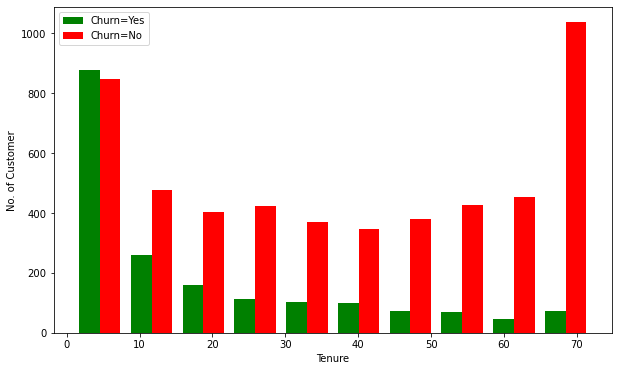

In [15]:
tenure_churn_yes = data[data["Churn"] == 'Yes']['tenure']
tenure_churn_no = data[data["Churn"] == 'No']['tenure']

plt.figure(figsize = (10,6))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label = ['Churn=Yes', 'Churn=No'])
plt.xlabel('Tenure')
plt.ylabel('No. of Customer')
plt.legend()
plt.show();

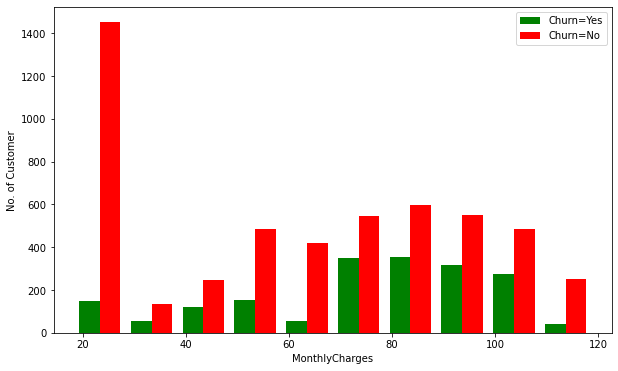

In [16]:
mc_churn_yes = data[data["Churn"] == 'Yes']['MonthlyCharges']
mc_churn_no = data[data["Churn"] == 'No']['MonthlyCharges']

plt.figure(figsize = (10,6))
plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label = ['Churn=Yes', 'Churn=No'])
plt.xlabel('MonthlyCharges')
plt.ylabel('No. of Customer')
plt.legend()
plt.show();

In [17]:
def unique_col_value(data):
    for column in data:
        print(f'{column} : {data[column].unique()}')
        
unique_col_value(data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [18]:
# We will replace 'No phone service' & 'No internet service' with No from the whole dataset wherever it is present

data.replace('No phone service', 'No', inplace= True)
data.replace('No internet service', 'No', inplace= True)

In [19]:
unique_col_value(data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [20]:
col = print(data.columns.to_list())
col

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [21]:
# replacing yes with 1 and no with 0 for all columns who is having yes and no.
col_yes_no = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for column in col_yes_no:
    data[column].replace({'Yes' : 1, 'No' : 0}, inplace = True)

In [22]:
unique_col_value(data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [23]:
# Let's do for the gender column
data['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [24]:
data['gender'].unique()

array([1, 0], dtype=int64)

In [25]:
# Converting InternetService , Contract , PaymentMethod into numeric using pd.get_dummies

data1 = pd.get_dummies(data=data, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0


In [27]:
data1.shape

(7032, 24)

In [32]:
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data1[col_to_scale] = scaler.fit_transform(data1[col_to_scale])
    

In [33]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,0,1,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0,0,1,0,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,1,0,0,0,0,1,0


In [34]:
unique_col_value(data1)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

From above we can say that all the columns are in one range between 0 and 1

In [35]:
#Splitting dataset into dependent and independent variable

X = data1.drop(['Churn'], axis = 1)
Y = data1["Churn"]

In [36]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X , Y, test_size = 0.25, random_state = 42)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(5274, 23)

(1758, 23)

(5274,)

(1758,)

In [38]:
import tensorflow
from tensorflow import keras

In [39]:
model = keras.Sequential([
    keras.layers.Dense(units = 20, input_dim = 23, kernel_initializer = 'he_uniform', activation = 'relu'),
    keras.layers.Dense(units = 15, kernel_initializer = 'he_uniform', activation = 'relu'),
    keras.layers.Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_history = model.fit(x_train, y_train,  validation_split= 0.30, batch_size= 10, epochs = 100)

Epoch 1/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8277 - val_loss: 0.4195 - val_accuracy: 0.8117
Epoch 2/100
370/370 [==============================] - 1s 3ms/step - loss: 0.3729 - accuracy: 0.8225 - val_loss: 0.4176 - val_accuracy: 0.8105
Epoch 3/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3707 - accuracy: 0.8255 - val_loss: 0.4190 - val_accuracy: 0.8117
Epoch 4/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3694 - accuracy: 0.8242 - val_loss: 0.4222 - val_accuracy: 0.8130
Epoch 5/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3698 - accuracy: 0.8288 - val_loss: 0.4266 - val_accuracy: 0.8117
Epoch 6/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3696 - accuracy: 0.8271 - val_loss: 0.4260 - val_accuracy: 0.8086
Epoch 7/100
370/370 [==============================] - 1s 3ms/step - loss: 0.3690 - accuracy: 0.8242 - val_loss: 0.4232 - val_accuracy: 0.8143

Epoch 58/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8480 - val_loss: 0.4715 - val_accuracy: 0.7979
Epoch 59/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8510 - val_loss: 0.4683 - val_accuracy: 0.8061
Epoch 60/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8513 - val_loss: 0.4728 - val_accuracy: 0.7985
Epoch 61/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8526 - val_loss: 0.4696 - val_accuracy: 0.8016
Epoch 62/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.8486 - val_loss: 0.4738 - val_accuracy: 0.7997
Epoch 63/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8523 - val_loss: 0.4759 - val_accuracy: 0.7966
Epoch 64/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3289 - accuracy: 0.8510 - val_loss: 0.4827 - val_accuracy:

In [44]:
model.evaluate(x_test, y_test)

55/55 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.7668


[0.570441484451294, 0.766780436038971]

In [48]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score : ", accuracy_score(y_test, y_pred), '\n')
print("confusion_matrix :")
confusion_matrix(y_test, y_pred)
print("classification_report :")
print(classification_report(y_test, y_pred))

accuracy_score :  0.7667804323094426 

confusion_matrix :


array([[1109,  191],
       [ 219,  239]], dtype=int64)

classification_report :
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1300
           1       0.56      0.52      0.54       458

    accuracy                           0.77      1758
   macro avg       0.70      0.69      0.69      1758
weighted avg       0.76      0.77      0.76      1758

